In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Ipython

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install graphviz

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import export_graphviz #to data visualize
import pydotplus #to convert to different datatype(like jpg,png)
from IPython.display import Image #to display image

from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree

In [5]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


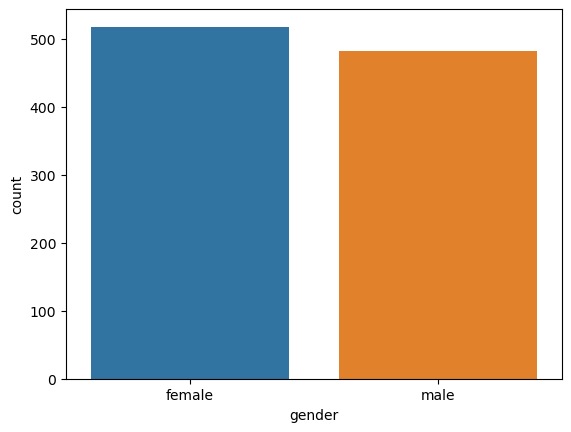

In [6]:
ax = sns.countplot(x = "gender", data = df)

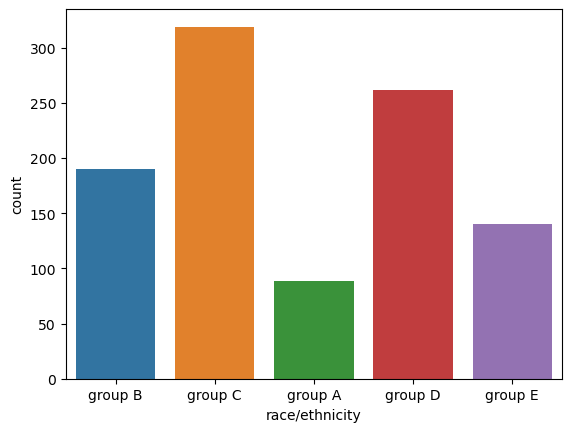

In [7]:
ax = sns.countplot(x = "race/ethnicity", data = df)

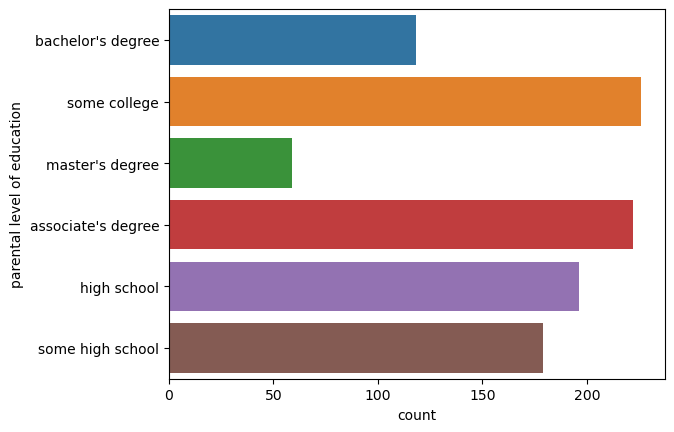

In [8]:
ax = sns.countplot(y = "parental level of education", data = df)

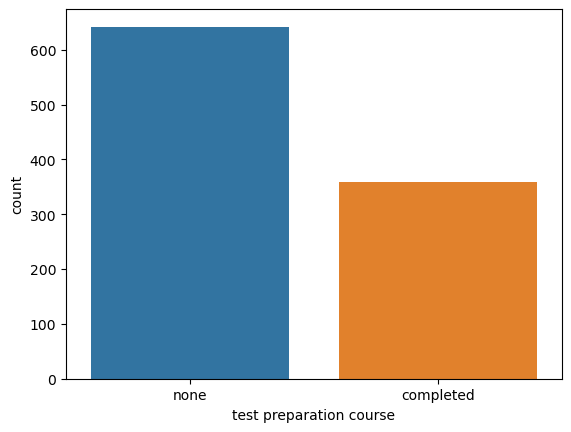

In [9]:
ax = sns.countplot(x = "test preparation course", data = df)

C:\Users\donsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


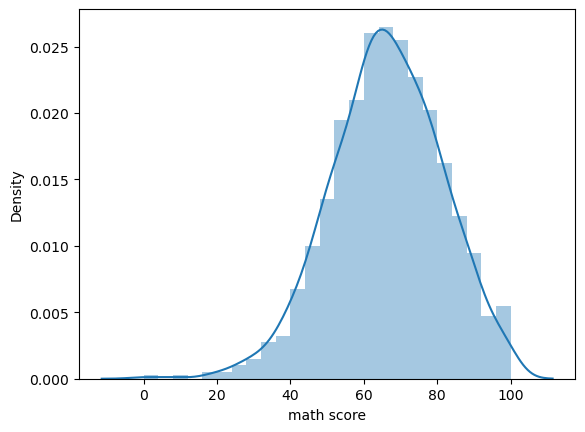

In [10]:
ax = sns.distplot(df["math score"])

In [11]:
df["math grade"] = ""
df.loc[(df["math score"] >= 60),"math grade"] = "Pass"
df.loc[(df["math score"] < 60),"math grade"] = "Fail"
df.drop(columns = ['math score', 'reading score', 'writing score'], inplace = True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math grade
0,female,group B,bachelor's degree,standard,none,Pass
1,female,group C,some college,standard,completed,Pass
2,female,group B,master's degree,standard,none,Pass
3,male,group A,associate's degree,free/reduced,none,Fail
4,male,group C,some college,standard,none,Pass
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,Pass
996,male,group C,high school,free/reduced,none,Pass
997,female,group C,high school,free/reduced,completed,Fail
998,female,group D,some college,standard,completed,Pass


In [12]:
one_hot = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
df = df.join(one_hot)

In [13]:
one_hot = pd.get_dummies(df['race/ethnicity'], prefix = 'race/ethnicity', drop_first = True)
df = df.join(one_hot)

In [14]:
one_hot = pd.get_dummies(df['parental level of education'], prefix='parental level of education', drop_first=True)
df = df.join(one_hot)

In [15]:
one_hot = pd.get_dummies(df['lunch'], prefix='lunch', drop_first=True)
df = df.join(one_hot)

In [16]:
one_hot = pd.get_dummies(df['test preparation course'], prefix='test preparation course', drop_first=True)
df = df.join(one_hot)

In [17]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,female,group B,bachelor's degree,standard,none,Pass,0,1,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,Pass,0,0,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,Pass,0,1,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,Fail,1,0,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,Pass,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,Pass,0,0,0,0,1,0,0,1,0,0,1,0
996,male,group C,high school,free/reduced,none,Pass,1,0,1,0,0,0,1,0,0,0,0,1
997,female,group C,high school,free/reduced,completed,Fail,0,0,1,0,0,0,1,0,0,0,0,0
998,female,group D,some college,standard,completed,Pass,0,0,0,1,0,0,0,0,1,0,1,0


In [18]:
col_to_drop = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

df = df.drop(columns = col_to_drop)
df

,math grade,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,Pass,0,1,0,0,0,1,0,0,0,0,1,1
1,Pass,0,0,1,0,0,0,0,0,1,0,1,0
2,Pass,0,1,0,0,0,0,0,1,0,0,1,1
3,Fail,1,0,0,0,0,0,0,0,0,0,0,1
4,Pass,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Pass,0,0,0,0,1,0,0,1,0,0,1,0
996,Pass,1,0,1,0,0,0,1,0,0,0,0,1
997,Fail,0,0,1,0,0,0,1,0,0,0,0,0
998,Pass,0,0,0,1,0,0,0,0,1,0,1,0


In [19]:
X = df.drop(['math grade'], axis = 1)
y = df['math grade']
X

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


In [20]:
y

0      Pass
1      Pass
2      Pass
3      Fail
4      Pass
       ... 
995    Pass
996    Pass
997    Fail
998    Pass
999    Pass
Name: math grade, Length: 1000, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
29,0,0,0,1,0,0,0,1,0,0,1,1
535,0,0,1,0,0,1,0,0,0,0,0,0
695,0,0,0,1,0,0,0,0,1,0,0,1
557,1,0,1,0,0,0,0,1,0,0,0,1
836,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,1,0,0,0,1,0,0,1,1
270,1,0,1,0,0,1,0,0,0,0,1,1
860,0,0,1,0,0,0,0,0,0,0,1,1
435,1,0,1,0,0,0,0,0,1,0,0,0


In [22]:
X_test

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
521,0,0,1,0,0,0,0,0,0,0,1,1
737,0,1,0,0,0,0,0,0,1,0,0,0
740,1,0,0,1,0,1,0,0,0,0,1,1
660,1,0,1,0,0,0,0,0,1,0,0,1
411,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
408,0,0,0,1,0,0,1,0,0,0,0,0
332,1,0,0,0,1,0,0,0,0,0,1,0
208,0,1,0,0,0,0,0,0,1,0,0,1
613,0,0,1,0,0,0,0,0,0,0,1,1


In [23]:
y_train

29     Pass
535    Pass
695    Pass
557    Pass
836    Pass
       ... 
106    Pass
270    Pass
860    Fail
435    Fail
102    Pass
Name: math grade, Length: 800, dtype: object

In [24]:
y_test

521    Pass
737    Fail
740    Pass
660    Pass
411    Pass
       ... 
408    Fail
332    Pass
208    Pass
613    Pass
78     Pass
Name: math grade, Length: 200, dtype: object

In [25]:
Clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features=None, random_state=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, class_weight=None)
Clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = Clf.predict(X_test)
y_pred

array(['Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass',
       'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass',
       'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass',
       'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail',
       'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
      

In [27]:
accuracy = accuracy_score(y_test, y_pred)
a = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['prediction/Fail','prediction/Pass'], index=['actual/fail','actual/pass'])
print("Accuracy :", accuracy,
     "\nConfusion Matrix :\n", a)

Accuracy : 0.57 
Confusion Matrix :
              prediction/Fail  prediction/Pass
actual/fail               26               44
actual/pass               42               88


In [28]:
clsrpt = classification_report(y_test, y_pred)
print("Report :\n", clsrpt)

Report :
               precision    recall  f1-score   support

        Fail       0.38      0.37      0.38        70
        Pass       0.67      0.68      0.67       130

    accuracy                           0.57       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.57      0.57      0.57       200



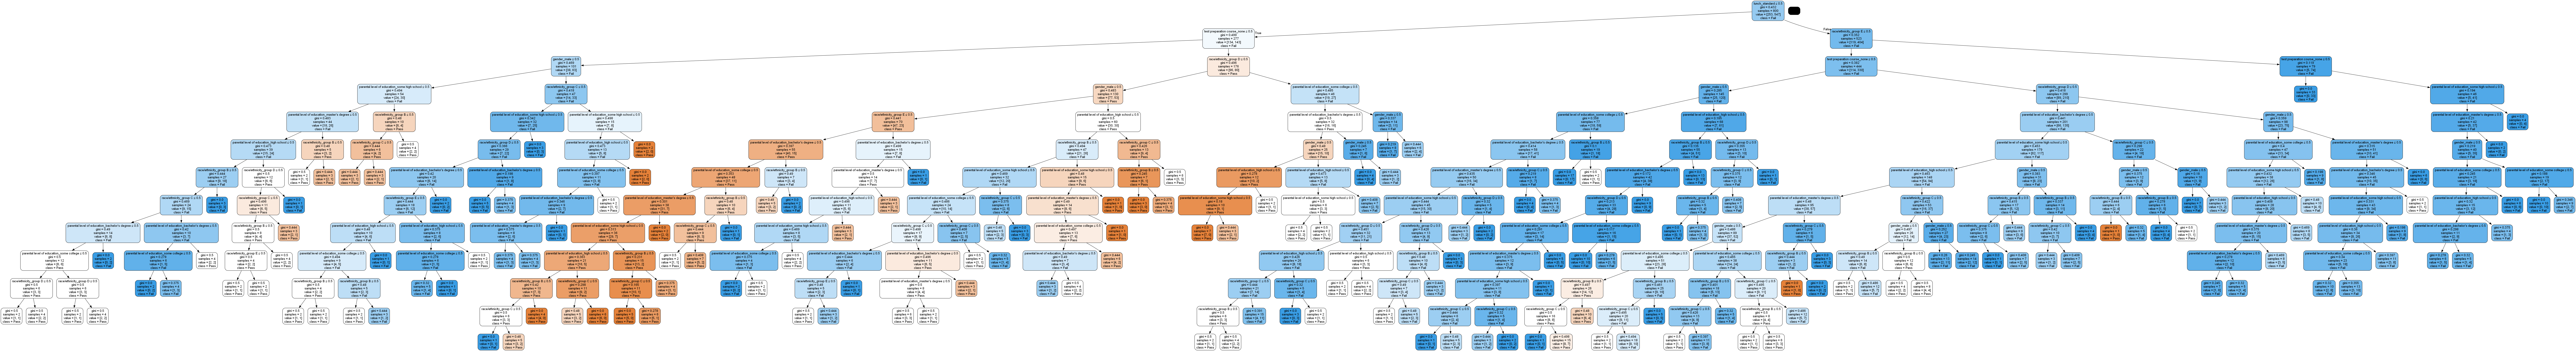

In [35]:
Clf = DecisionTreeClassifier(random_state=42)
Clf.fit(X_train, y_train)

dot_data = export_graphviz(Clf, out_file=None,
                          feature_names=X.columns,
                          class_names=y.unique(),
                          filled=True, rounded=True,
                          special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

Image('decision_tree.png')

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_logis = model.predict(X_test)
y_pred_logis

array(['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass',
       'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass',
       'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass',
       'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail',
       'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail',
      

In [33]:
accuracy = accuracy_score(y_test, y_pred_logis)
report = classification_report(y_test, y_pred_logis)
print("Accuracy :", accuracy,
     "\n Classification report :\n", report)

Accuracy : 0.645 
 Classification report :
               precision    recall  f1-score   support

        Fail       0.49      0.24      0.32        70
        Pass       0.68      0.86      0.76       130

    accuracy                           0.65       200
   macro avg       0.58      0.55      0.54       200
weighted avg       0.61      0.65      0.61       200

